## Visualizing Data with Pandas and MatPlotLib


### As a Data Analyst, I want to set up the proper imports so I have access to the Pandas and MatPlotLib libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

### As a Data Analyst, I want to import and store the `ufo_sightings.csv` file in a variable

In [54]:
dirty_ufo_sightings = pd.read_csv('ufo_sightings.csv', index_col='#')
dirty_ufo_sightings.head(3)

,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Described_Duration,Description,Date_Documented,Latitude,Longitude
#,,,,,,,,,,,
0,10/10/1949 20:30,San Marcos,TX,US,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,10/10/1949 21:00,Lackland Afb,TX,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,10/10/1955 17:00,Chester (Uk/England),NaN,GB,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667


### As a Data Analyst, I want to ensure my DataFrame is cleaned by removing any **null** values

In [55]:
no_nulls_dirty_ufo_sightings = dirty_ufo_sightings.dropna()
no_nulls_dirty_ufo_sightings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53562 entries, 0 to 65535
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date_Time            53562 non-null  object 
 1   City                 53562 non-null  object 
 2   State/Province       53562 non-null  object 
 3   Country              53562 non-null  object 
 4   UFO_Shape            53562 non-null  object 
 5   Length_of_Encounter  53562 non-null  float64
 6   Described_Duration   53562 non-null  object 
 7   Description          53562 non-null  object 
 8   Date_Documented      53562 non-null  object 
 9   Latitude             53562 non-null  float64
 10  Longitude            53562 non-null  float64
dtypes: float64(3), object(8)
memory usage: 4.9+ MB


### As a Data Analyst, I want to filter my DataFrame to remove any information that is not related to my analysis
* This will include **dropping** the **Described_Duration, Description, and Date_Documented** columns

In [56]:
clean_ufo_sightings=no_nulls_dirty_ufo_sightings.drop(['Described_Duration','Description','Date_Documented'], axis=1)
clean_ufo_sightings.head()

,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Latitude,Longitude
#,,,,,,,,
0,10/10/1949 20:30,San Marcos,TX,US,cylinder,2700.0,29.883056,-97.941111
3,10/10/1956 21:00,Edna,TX,US,circle,20.0,28.978333,-96.645833
4,10/10/1960 20:00,Kaneohe,HI,US,light,900.0,21.418056,-157.803611
5,10/10/1961 19:00,Bristol,TN,US,sphere,300.0,36.595000,-82.188889
7,10/10/1965 23:45,Norwalk,CT,US,disk,1200.0,41.117500,-73.408333


### As a Data Analyst, I want to convert the `Date_Time` column to utilize Pandas' DateTime data type

In [57]:
clean_ufo_sightings['Date_Time'] = pd.to_datetime(clean_ufo_sightings['Date_Time'])
clean_ufo_sightings.head()

,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Latitude,Longitude
#,,,,,,,,
0,1949-10-10 20:30:00,San Marcos,TX,US,cylinder,2700.0,29.883056,-97.941111
3,1956-10-10 21:00:00,Edna,TX,US,circle,20.0,28.978333,-96.645833
4,1960-10-10 20:00:00,Kaneohe,HI,US,light,900.0,21.418056,-157.803611
5,1961-10-10 19:00:00,Bristol,TN,US,sphere,300.0,36.595000,-82.188889
7,1965-10-10 23:45:00,Norwalk,CT,US,disk,1200.0,41.117500,-73.408333


## Data Visualization with Matplotlib

### As a Data Analyst, I want to visualize the **frequency of different UFO shapes**, to determine which UFO shapes are most commonly encountered
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

Text(0.5, 1.0, 'UFO Shapes Seen the Most')

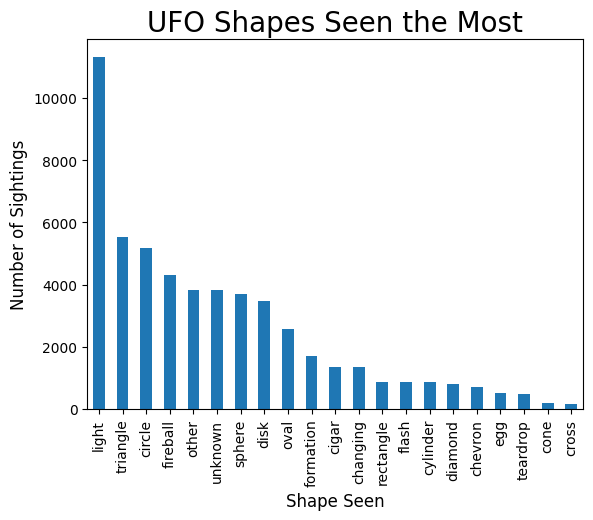

In [58]:
shapes_frequency = clean_ufo_sightings['UFO_Shape'].value_counts()
plot_shape_frequency = shapes_frequency.plot.bar()
plt.ylabel('Number of Sightings', fontsize=12)
plt.xlabel('Shape Seen', fontsize=12);
plt.title('UFO Shapes Seen the Most', fontsize=20)

### As a Data Analyst, I want to visualize the **number of UFO encounters**, grouped by each decade, to see if there is a correlation between number of sightings and decade
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

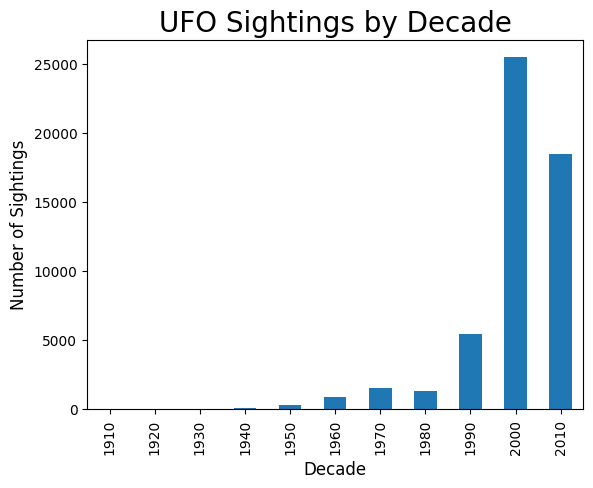

In [59]:
clean_ufo_sightings['By_Decade'] = (clean_ufo_sightings['Date_Time'].dt.year // 10)*10
sightings_by_decade = clean_ufo_sightings['By_Decade'].value_counts().sort_index()
plot_sightings_by_decade = sightings_by_decade.plot.bar()
plt.ylabel('Number of Sightings', fontsize=12)
plt.xlabel('Decade', fontsize=12)
plt.title('UFO Sightings by Decade', fontsize=20);


### As a Data Analyst, I want to create a **Line Graph** to visualize the **Frequency of UFO sightings, by hour of the day**
* I will use a **Line Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

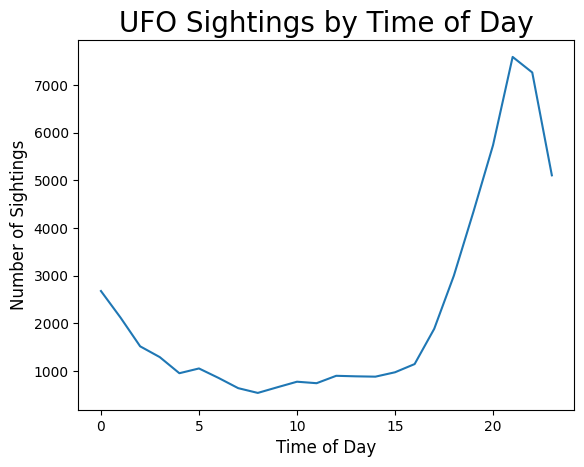

In [60]:
clean_ufo_sightings['Time of Day'] = (clean_ufo_sightings['Date_Time'].dt.hour)
sightings_by_hour = clean_ufo_sightings['Time of Day'].value_counts().sort_index()
plot_sightings_by_hour = sightings_by_hour.plot.line(x='Time of Day', y='sightings_by_hour')
# plt.xticks(clean_ufo_sightings['Time of Day'])
plt.ylabel('Number of Sightings', fontsize=12)
plt.xlabel('Time of Day', fontsize=12)
plt.title('UFO Sightings by Time of Day', fontsize=20);

### As a Data Analyst, I want to answer all questions in the following Markdown block to provide a **clear and detailed analysis of my UFO sighting findings**

1. Which UFO shape is the most frequently reported? 
    * Q1 Answer  - Most sightings are not of a particular shape at all but is reported as seeing light.

2. Which shape is least frequently reported?
    * Q2 Answer - The shape least frequently reported as being seen is a cross.

3. Based on your analysis, what times of the day have the highest number of UFO sightings? 
    * Q3 Answer - 21:00 (9pm)

4. Are there other factors that may account for this pattern in the data?
    * Q4 Answer - That is a time where greater number of people are up when compared with later at night and greater amount of darkness when compared with earlier in the day.

5. Do you see any surprising trends in the breakdown by decade? Do you have any theories or ideas that may explain these patterns?
    * Q5 Answer - The 2000's saw a great increase in sightings, possibly due to the speculation of many people of what "Y2K" would bring. Increased testing of stealth air force technology may have been a factor as well.

6. Based on your data analysis, what recommendation would you give to individuals interested in encountering a UFO?
    * For example, what time would be best to look, what UFO shapes should they expect to see, etc.
    * Q6 Answer - I would recommend going out as late as possible, perhaps starting early in the night to past midnight. 
    There will more than likely not be a diffinitive shape seen, most people describe seeing light of a variation of a sphere or circle.


### **Bonus:** As a Data Analyst, I want to visualize the frequency of **different UFO shape sightings for Virginia, Wisconsin, and Tennessee**, to see if there is any variation of UFO shape frequency between states
* I will use a **Grouped Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

<AxesSubplot: xlabel='State/Province,UFO_Shape'>

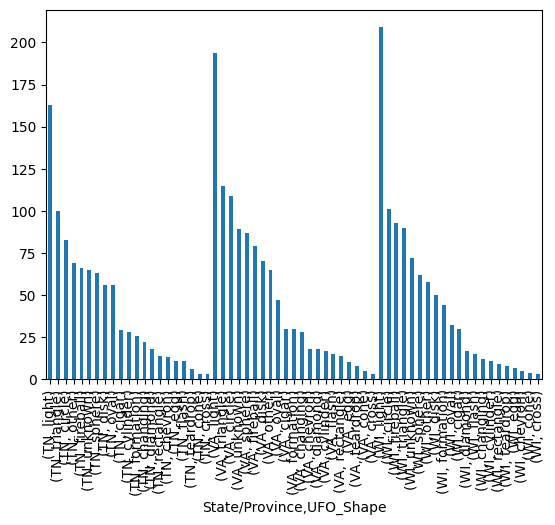

In [69]:
selected_states = ['VA', 'WI', 'TN']
filtered_to_selected_states = clean_ufo_sightings[clean_ufo_sightings['State/Province'].isin(selected_states)]
filtered_and_grouped = filtered_to_selected_states.groupby('State/Province')['UFO_Shape'].value_counts()
filtered_and_grouped.plot.bar()

# couldn't quite get it